# **2章　機械学習の構造を理解しよう**

# 2-3 教師あり機械学習の回帰を実践してみよう：線形回帰

コード 2-3-1

In [1]:
!pip install japanize-matplotlib

import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=55da4ef0d4e614f1838faf98670edf0e3f9e8633018197026ad607ba5aba95c0
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


コード2-3-2

In [3]:
from sklearn.datasets import load_diabetes
dm = load_diabetes(as_frame=True, scaled=False)

コード2-3-3

In [4]:
type(dm)

sklearn.utils._bunch.Bunch

コード2-3-4

In [5]:
dm

{'data':       age  sex   bmi      bp     s1     s2    s3    s4      s5     s6
 0    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0
 1    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0
 2    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0
 3    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0
 4    50.0  1.0  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0
 ..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...
 437  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0
 438  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0
 439  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0
 440  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0
 441  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0
 
 [442 rows x 10 columns],
 'target': 0      151.0
 1       75.0
 2      141.0
 3      206.0
 4      135.0
        ...  
 437    178.0
 438

コード2-3-5

In [6]:
print(dm.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

コード2-3-6

In [7]:
y_dm = dm.target
y_dm.head()


0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

コード2-3-7

In [8]:
y_dm.shape

(442,)

コード2-3-8

In [9]:
type(y_dm)

pandas.core.series.Series

コード2-3-9

In [10]:
y_dm.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

コード2-3-10

In [11]:
x_dm = dm.data
x_dm.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


コード2-3-11

In [12]:
x_dm.shape

(442, 10)

コード2-3-12

In [14]:
type(x_dm)

pandas.core.frame.DataFrame

コード2-3-13

In [15]:
x_dm.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


コード2-3-14

In [17]:
x_bmi=x_dm[['bmi']]
x_bmi

,bmi
0,32.1
1,21.6
2,30.5
3,25.3
4,23.0
...,...
437,28.2
438,24.9
439,24.9
440,30.0


コード2-3-15

In [18]:
x_bmi.shape

(442, 1)

コード2-3-16

In [19]:
type(x_bmi)

pandas.core.frame.DataFrame

コード2-3-17

In [20]:
x_bmi1 =x_dm['bmi']
print(x_bmi1.shape)
print(type(x_bmi1))

(442,)
<class 'pandas.core.series.Series'>


コード2-3-18

In [22]:
from sklearn.linear_model import LinearRegression
model_bmi = LinearRegression()

コード2-3-19

In [23]:
model_bmi.fit(x_bmi, y_dm)

LinearRegression()

コード2-3-20

In [26]:
print(model_bmi.coef_)
print(model_bmi.intercept_)

[10.23312787]
-117.77336656656527


コード2-3-21

In [27]:
pre = pd.DataFrame([[20]], columns=['bmi'])
print(pre)
print(pre.shape)
print(type(pre))

   bmi
0   20
(1, 1)
<class 'pandas.core.frame.DataFrame'>


コード2-3-22

In [28]:
print(model_bmi.predict(pre))

[86.88919084]


コード2-3-23

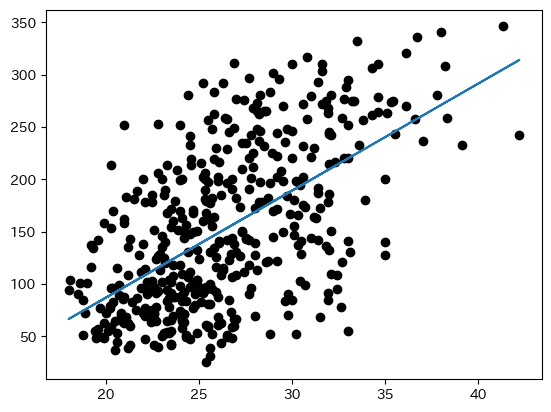

In [30]:
plt.scatter(x_bmi, y_dm, color='black')
plt.plot(x_bmi, model_bmi.predict(x_bmi))

コード2-3-24

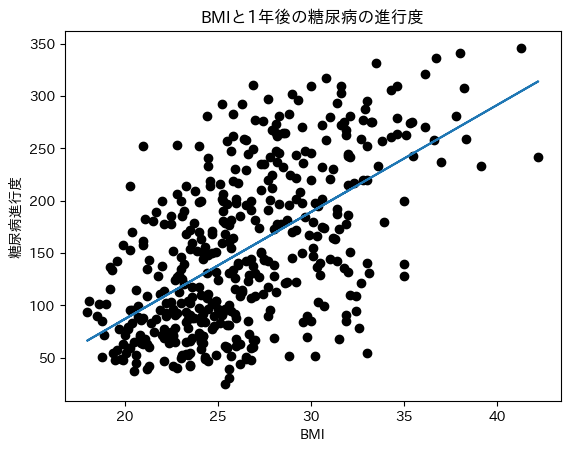

In [32]:
plt.figure()
plt.title('BMIと1年後の糖尿病の進行度')
plt.xlabel('BMI')
plt.ylabel('糖尿病進行度')
plt.scatter(x_bmi, y_dm, color='black')
plt.plot(x_bmi, model_bmi.predict(x_bmi))
plt.show()

コード2-3-25

In [33]:
print(model_bmi.score(x_bmi, y_dm))

0.3439237602253802


コード2-3-26

In [34]:
model_dm10 = LinearRegression()
model_dm10.fit(x_dm, y_dm)

LinearRegression()

コード2-3-27

In [35]:
print(model_dm10.coef_)
print(model_dm10.intercept_)

[-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
 -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
  6.84831250e+01  2.80116989e-01]
-334.5671385187877


コード2-3-28

In [36]:
print(model_dm10.score(x_dm, y_dm))

0.5177484222203498


# 2-4 学習データと検証データの分割

コード2-4-1

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_dm, y_dm, test_size=0.3, random_state=0)

コード2-4-2

In [38]:
from sklearn.linear_model import LinearRegression
model_dm = LinearRegression()
model_dm.fit(x_train,y_train)

LinearRegression()

コード2-4-3

In [40]:
print(model_dm.predict(x_test))

[239.67646226 250.52785246 164.85108003 120.27660503 181.73443919
 262.21130761 112.23506474 191.94794432 151.49899378 236.97230238
 172.17064249 181.76621901 112.11999874  93.10380711 242.61242687
  91.18595934 153.65788928  64.67647092  99.36484095 212.26056138
 197.04060446 162.46365074 164.1435797  157.73720559 207.25521787
 170.20643739 111.97244286  82.77403445 186.91422667 164.71981545
 175.37450608  82.34705002 144.29011545 149.22311094 144.09055592
 194.25826256 166.5246271  188.10529014 126.97581238 205.91418409
  85.53291478 167.78048883 147.74631196 183.85195035 177.14599535
  71.92736587 139.84170986 139.03352655 125.11919021 231.42311603
 163.79321356  78.92705801 151.43615002 159.59655213 237.28482326
 176.12400723 191.69400387 118.93294883 131.10216716 174.80489902
 216.57056952 169.8778643  156.38489415 113.57318152 261.96434153
 155.57089274  84.32920798 228.12508784 208.51475188  46.18887137
  76.55796139 133.97122124 108.91396865 143.46955769 134.31142541
 190.24580

In [41]:
print(np.array(y_test))

[321. 215. 127.  64. 175. 275. 179. 232. 142.  99. 252. 174. 129.  74.
 264.  49.  86.  75. 101. 155. 170. 276. 110. 136.  68. 128. 103.  93.
 191. 196. 217. 181. 168. 200. 219. 281. 151. 257.  49. 198.  96. 179.
  95. 198. 244.  89. 214. 182.  84. 270. 156. 138. 113. 131. 195. 171.
 122.  61. 230. 235.  52. 121. 144. 107. 132. 302.  53. 317. 137.  57.
  98. 170.  88.  90.  67. 163. 104. 186. 180. 283. 141. 150.  47. 297.
 104.  49. 103. 142.  59.  85. 137.  53.  51. 197. 135.  72. 208. 237.
 145. 110. 292.  97. 197. 158. 163.  63. 192. 233.  68. 160. 178.  68.
 109.  94. 118. 275. 275. 127. 281.  71.  42.  71. 128. 272. 135.  51.
 220. 167.  78. 131. 212. 182. 174.]


コード2-4-4

In [44]:
print(model_dm.score(x_test, y_test))

0.39289927216962883


# 2-5 教師あり機械学習の回帰を実践してみよう：ロジスティック回帰

コード2-5-1

In [45]:
import numpy as np
import pandas as pd

コード2-5-2

In [46]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer (as_frame = True)
bc

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

コード2-5-3

In [47]:
type(bc)

sklearn.utils._bunch.Bunch

コード2-5-4

In [48]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

コード2-5-5

In [49]:
y_bc = bc.target
y_bc.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

コード2-5-6

In [50]:
print(y_bc.shape)
print(type(y_bc))

(569,)
<class 'pandas.core.series.Series'>


コード2-5-7

In [51]:
y_bc.value_counts()

1    357
0    212
Name: target, dtype: int64

コード2-5-8

In [52]:
x_bc = bc.data
x_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


コード2-5-9

In [53]:
x_bc10 = x_bc.iloc[:, 0:10]
x_bc10.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


コード2-5-10

In [54]:
print(x_bc10.shape)
print(type(x_bc10))

(569, 10)
<class 'pandas.core.frame.DataFrame'>


コード2-5-11

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_bc10, y_bc,test_size=0.3, random_state=0)

コード2-5-12

In [56]:
from sklearn.linear_model import LogisticRegression
model_bc = LogisticRegression()

コード2-5-13

In [57]:
model_bc.fit(x_train, y_train)

LogisticRegression()

コード2-5-14

In [58]:
print(model_bc.coef_)
print(model_bc.intercept_)

[[ 4.43803517 -0.15747975 -0.49120368 -0.02299483 -0.1977349  -0.88107831
  -1.17436636 -0.51610975 -0.32416124 -0.06441917]]
[0.71206521]


コード2-5-15

In [59]:
print(model_bc.predict(x_test))

[1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0
 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1]


In [60]:
print(np.array(y_test))

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1]


コード2-5-16

In [61]:
print(model_bc.predict_proba(x_test))

[[4.57042606e-01 5.42957394e-01]
 [1.79395138e-01 8.20604862e-01]
 [8.66171843e-02 9.13382816e-01]
 [1.65251193e-01 8.34748807e-01]
 [5.37373549e-02 9.46262645e-01]
 [4.12045708e-02 9.58795429e-01]
 [2.02153766e-01 7.97846234e-01]
 [3.44362161e-02 9.65563784e-01]
 [3.93259776e-02 9.60674022e-01]
 [2.17382152e-02 9.78261785e-01]
 [5.21246619e-01 4.78753381e-01]
 [5.20485625e-01 4.79514375e-01]
 [3.52139768e-02 9.64786023e-01]
 [7.88984581e-01 2.11015419e-01]
 [2.92045774e-01 7.07954226e-01]
 [5.90735218e-01 4.09264782e-01]
 [9.94202404e-02 9.00579760e-01]
 [9.99915622e-01 8.43783507e-05]
 [9.99057991e-01 9.42008765e-04]
 [9.99965744e-01 3.42556666e-05]
 [1.82782201e-01 8.17217799e-01]
 [9.33806436e-01 6.61935643e-02]
 [7.28143828e-02 9.27185617e-01]
 [4.02062913e-02 9.59793709e-01]
 [9.99818823e-01 1.81177362e-04]
 [1.47654093e-02 9.85234591e-01]
 [8.44804001e-03 9.91551960e-01]
 [8.55281169e-01 1.44718831e-01]
 [6.50238395e-02 9.34976161e-01]
 [9.94539733e-01 5.46026657e-03]
 [2.281561

コード2-5-17

In [ ]:
print(model_bc.score(x_test,y_test))

0.9181286549707602


In [62]:
print(model_bc.score(x_train,y_train))

0.907035175879397
